In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from google.colab import files
from sklearn.model_selection import train_test_split

In [ ]:

dataset = files.upload()

Saving pems_output4.csv to pems_output4.csv


In [ ]:
df = pd.read_csv('pems_output4.csv')
%matplotlib inline

In [ ]:
df.sample(5)

,5 Minutes,Lane 1 Flow (Veh/5 Minutes),Lane 2 Flow (Veh/5 Minutes),Flow (Veh/5 Minutes),# Lane Points,% Observed
1686,2/27/2019 20:30,25,27,52,2,0.0
127,2/22/2019 10:35,40,39,79,2,0.0
577,2/24/2019 0:05,14,18,32,2,0.0
1073,2/25/2019 17:25,37,37,74,2,0.0
1758,2/28/2019 2:30,8,13,21,2,0.0


In [ ]:
df['Lane 1 Flow (Veh/5 Minutes)'].describe()

count    2016.000000
mean       27.767361
std        13.640363
min         1.000000
25%        15.000000
50%        30.000000
75%        39.000000
max        61.000000
Name: Lane 1 Flow (Veh/5 Minutes), dtype: float64

In [ ]:
df = df['Lane 1 Flow (Veh/5 Minutes)'].values
df = df.reshape(-1, 1)

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Building Lstm model

model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history  = model.fit(x_train, y_train, epochs=30, batch_size=30)

Epoch 1/30
53/53 [==============================] - 8s 142ms/step - loss: 0.0092
Epoch 2/30
53/53 [==============================] - 8s 143ms/step - loss: 0.0095
Epoch 3/30
53/53 [==============================] - 8s 143ms/step - loss: 0.0089
Epoch 4/30
53/53 [==============================] - 8s 143ms/step - loss: 0.0081
Epoch 5/30
53/53 [==============================] - 7s 141ms/step - loss: 0.0089
Epoch 6/30
53/53 [==============================] - 8s 141ms/step - loss: 0.0084
Epoch 7/30
53/53 [==============================] - 7s 141ms/step - loss: 0.0079
Epoch 8/30
53/53 [==============================] - 7s 140ms/step - loss: 0.0086
Epoch 9/30
53/53 [==============================] - 7s 141ms/step - loss: 0.0082
Epoch 10/30
53/53 [==============================] - 8s 144ms/step - loss: 0.0072
Epoch 11/30
53/53 [==============================] - 8s 142ms/step - loss: 0.0072
Epoch 12/30
53/53 [==============================] - 8s 143ms/step - loss: 0.0082
Epoch 13/30
53/53 [======

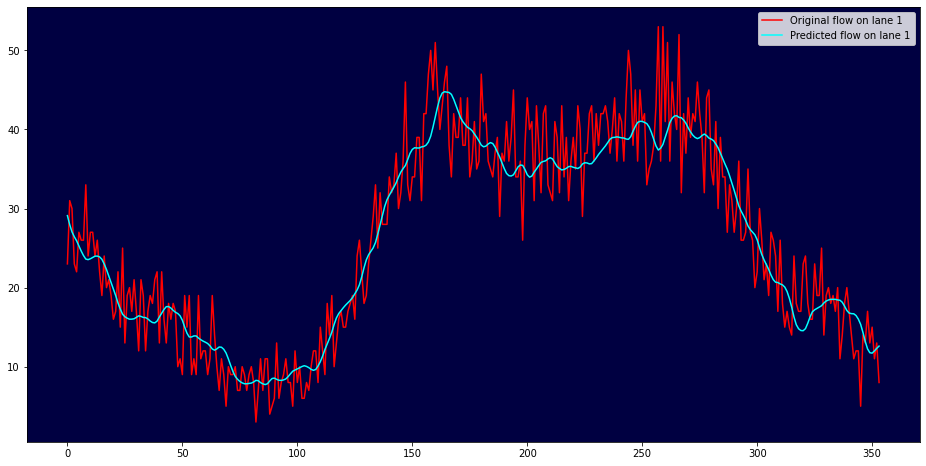

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original flow on lane 1')
plt.plot(predictions, color='cyan', label='Predicted flow on lane 1')
plt.legend()